# Stage 3 : EDA

We have the clean data; accounting for basic aspects of data quality
- Type consistency


As well are more bespoke aspects
- Reduce class imbalance


In [7]:
import os
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def _load_data(ROOT):
    
    with open(os.path.join(ROOT,'USCensus1990raw.attributes.txt'), 'r') as f:
        text = f.read()
    
    text = text.replace("\n\n","")
    print(text)
    
    sep = '__________________________________________________________________________________'

    all_codes = {}
    for t in text.split(sep)[1:]:

        lines = t.split('\n')

        colname = lines[1][:10].rstrip(' ')
        lines = [l.lstrip(' ').rstrip(' ') for l in lines[2:] if (l !='') and not l.startswith('VAR:')]
        coding = {}
        for line in lines:
            l = [l for l in line.split(' ') if l != '']
            coding[l[0]] = " ".join(l[1:])

        all_codes[colname] = coding
        
        
    cols = text.split('__________________________________________________________________________________')
    len(cols)
    cols = [c.split('\n')[1] for c in cols[1:]]
    cols = [c for c in cols if c != '']
    frame = ""
    for c in cols:
        li = [c[:10].rstrip(' '), c[13:14], c[21:22],c[28:29], c[42:].replace(",", ".")]
        if len(li) !=5:
            print(li)
        frame += r",".join(li) + "\n"


    df_meta = pd.read_csv(io.StringIO(frame), sep=',', header=None, names=['Var', 'Type', 'Des', 'Len', 'Description'])
    
    return df_meta, all_codes


df_meta, all_codes = _load_data(r"./")

                           U.S. DEPARTMENT OF COMMERCE
                                 BUREAU OF CENSUS

                          *** DATA EXTRACTION SYSTEM ***

  DOCUMENTATION OF: FILE CONTENTS

  FOR DATA COLLECTION: 'pums901p' - 1990 Decenial Census 1% PUMS - Persons Records

    VAR: = Variable Name
    TYP: = Variable Type     ( C = Categorical, N = Numeric Continuous )
    DES: = Designation       ( P = Primary Variable, X = Non-Primary )
    LEN: = Length            ( of the Variable in Characters )
    CAT: = Category          ( of the Variable )


VAR:        TYP:   DES:    LEN:   CAT:    VARIABLE/CATEGORY LABEL:
__________________________________________________________________________________
AAGE         C       X      1             Age Allocation Flag
                                  0       No
                                  1       Yes

VAR:        TYP:   DES:    LEN:   CAT:    VARIABLE/CATEGORY LABEL:
_______________________________________________________________

In [9]:
df = pd.read_csv('us_census_data_cleaned.csv').drop('Unnamed: 0', axis=1)

In [10]:
df.head(5)

,AGE,ANCSTRY1,ANCSTRY2,CITIZEN,CLASS,DEPART,DISABL1,ENGLISH,FEB55,FERTIL,...,YEARSCH,YRSSERV,YEARSCH_CAT,OCCUP_JOB,OCCUP_SUM,OCCUP_MAJ,INDUSTRY_CAT,INDUSTRY_SUM,RACE2,count
0,30,999,999,True,"Local Gov. Emp. City, County, Etc.",480,2,1,0,3,...,11,0,"Some Coll., But No Degree","Cooks (5214, 5215)",SERVICE OCCUPATIONS,"Service Occupations, Except Protective and Hou...",Elementary and secondary schools (821),PROFESSIONAL AND RELATED SERVICES,"White 800 869, 971",1
1,44,999,999,True,Emp. of a Private for Profit Company or,330,2,1,0,0,...,11,0,"Some Coll., But No Degree",Electricians (part 6432),"PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPA...",Construction Trades,"CONSTRUCTION (15, 16, 17)","CONSTRUCTION (15, 16, 17)","White 800 869, 971",1
2,47,50,999,True,"Local Gov. Emp. City, County, Etc.",870,2,1,1,0,...,11,2,"Some Coll., But No Degree","Police and detectives, public service (5132)",SERVICE OCCUPATIONS,Protective Service Occupations,"Justice, public order, and safety (92)",PUBLIC ADMINISTRATION,"White 800 869, 971",1
3,42,615,999,False,"Self Emp. in Own Not Incorp.d Business,",420,2,1,0,0,...,16,0,Professional Degree,Physicians (261),MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS,Professional Specialty Occupations,"Offices and clinics of physicians (801, 803)",PROFESSIONAL AND RELATED SERVICES,"Asian Indian 600, 982",1
4,52,210,999,True,Fed. Gov. Emp.,300,2,1,1,0,...,13,9,"Associate Degree in Coll., Academic Prog","Production inspectors, checkers, and examiners...","OPERATORS, FABRICATORS, AND LABORERS","Machine Operators, Assemblers, and Inspectors",Electric light and power (491),"TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBL...","Other Race 700 799, 986 999",1


One aspect we need to pay attention to is what tpye of data is in each feature, categorical vs continuous

In [11]:
num_cols = [
    'AGE',
    'YEARWRK',
    'FERTIL',
    'HOUR89',
    'HOURS',
    'RIDERS',
    'WEEK89', 
    'TRAVTIME',
    'YRSSERV',
    'REARNING',
    'INCOME1',
    'PWGT1',
    'DEPART',
    'RIDERS',
]

cats = [
    'OCCUP',
    'OCCUP_JOB',
    'OCCUP_SUM',
    'OCCUP_MAJ',
    'INDUSTRY',
    'RACE',
    'SEX',
    'ENGLISH',
    'FERTIL',
    'WWII',
    'SCHOOL',
    'MARITAL',
    'MEANS',
    'MILITARY',
    'CITIZEN',
    'YEARSCH',
    'CLASS',
#     'SEPT80',
    'POWSTATE',
    'VIETNAM',
    'KOREAN'
]

In [12]:
def describe_feature(x): 
    v = df_meta[df_meta['Var'] == x]['Description'].values
    if len(v) == 0:
        return ''
    else:
        return v[0]

for x in list(df.columns):
    try:
        print(f"{x:<20} - {describe_feature(x)}")
    except:
        print(x)

AGE                  - Age
ANCSTRY1             - Ancestry First Entry See Appendix I Ance
ANCSTRY2             - Ancestry Second Entry See Appendix I Anc
CITIZEN              - Citizenship
CLASS                - Class of Worker
DEPART               - Time of Departure for Work Hour and Minu
DISABL1              - Work Limitation Stat.
ENGLISH              - Ability to Speak English
FEB55                - Served February 1955 July 1964
FERTIL               - No. of Chld. Ever Born
HISPANIC             - Detailed Hispanic Origin Code See Append
HOUR89               - Usual Hrs. Worked Per Week Last Yr. 1989
HOURS                - Hrs. Worked Last Week
IMMIGR               - Yr. of Entry
INDUSTRY             - Ind. See Appendix I Ind..lst
KOREAN               - Served Korean Conflict June 1950 January
MARITAL              - Marital Stat.
MAY75880             - Served May 1975 to August 1980
MEANS                - Means of Transportation to Work
MIGPUMA              - Migration Puma State

# Explore how input features influence target variable

- EDA will uncover ways to further clean data (one of the common feedback loops in ML)

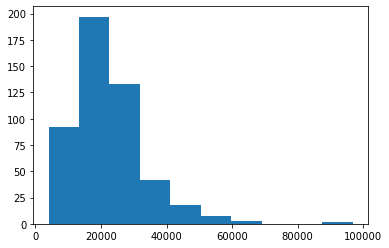

In [13]:
# histogram of mean wage per occupation
_ = plt.hist(df[['OCCUP', 'REARNING']].groupby('OCCUP').mean())

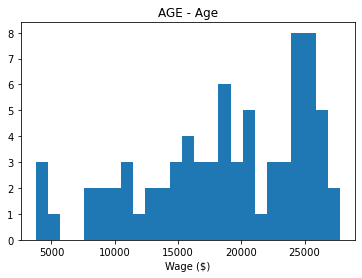

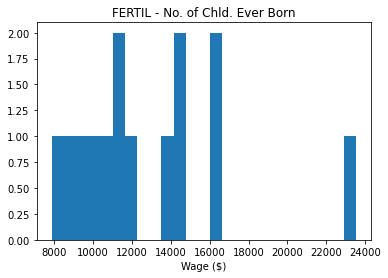

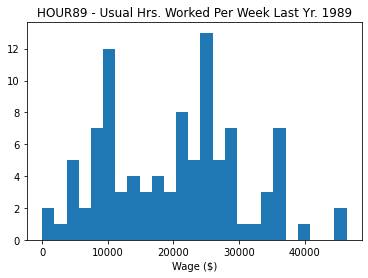

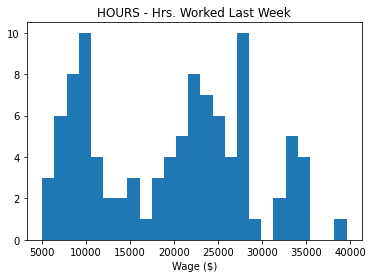

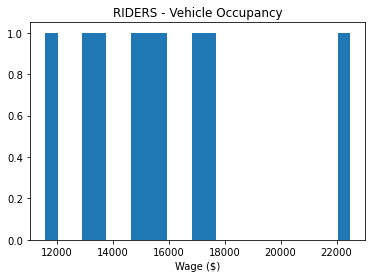

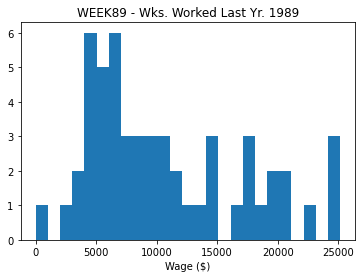

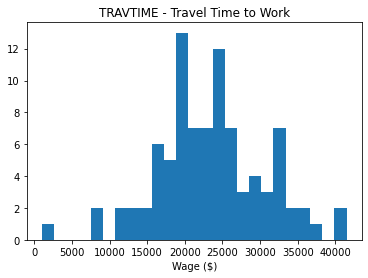

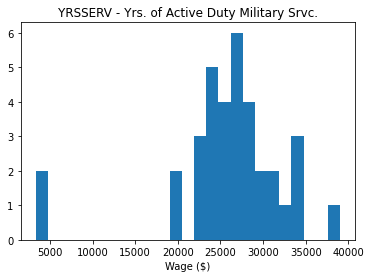

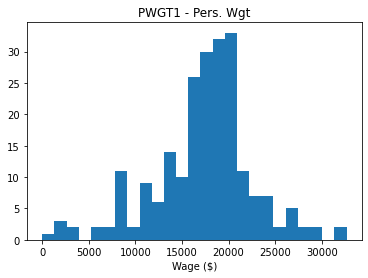

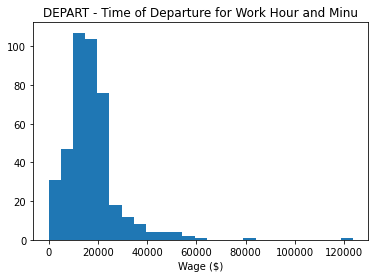

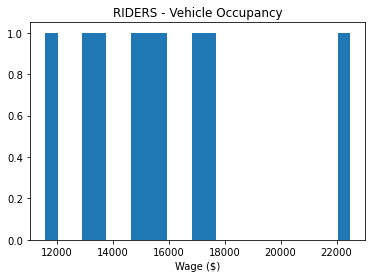

In [14]:
# histogram of mean wage per occupation
for var in num_cols:
    if var == 'REARNING' or var not in df.columns:
        continue
    _ = plt.hist(df[[var, 'REARNING']].groupby(var).mean(), bins=25)
    plt.title(f"{var} - {describe_feature(var)}")
    plt.xlabel(r"Wage ($)")
    plt.show()

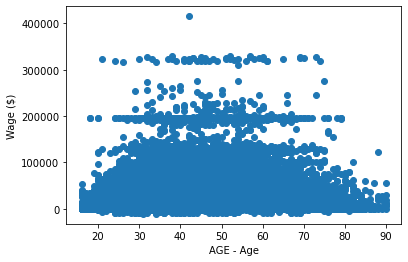

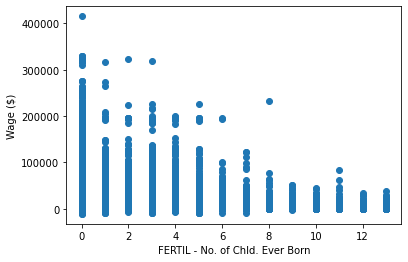

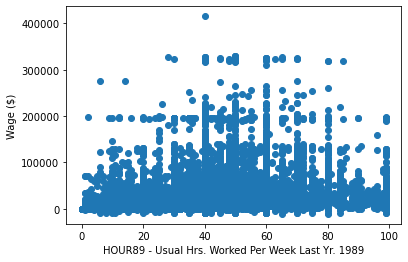

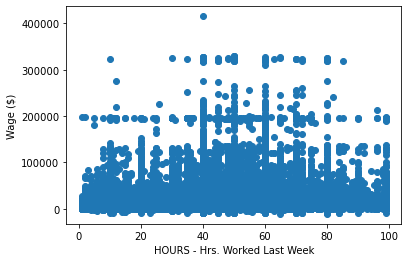

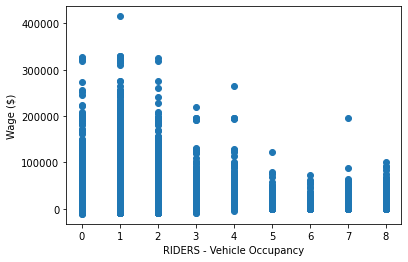

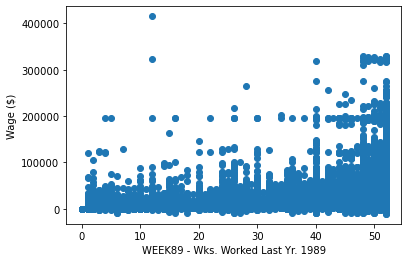

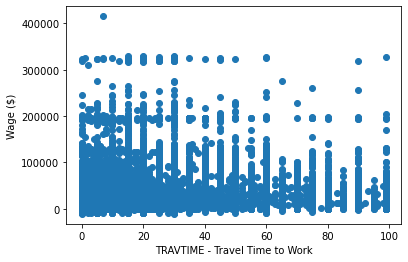

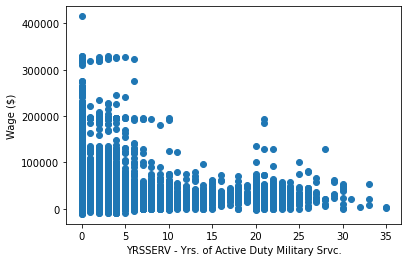

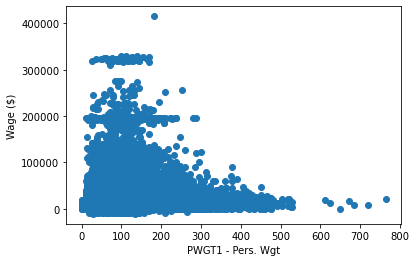

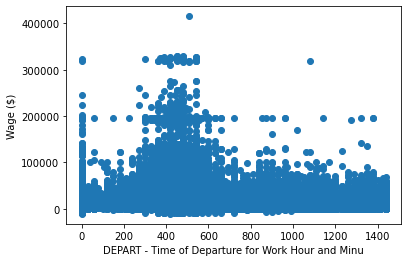

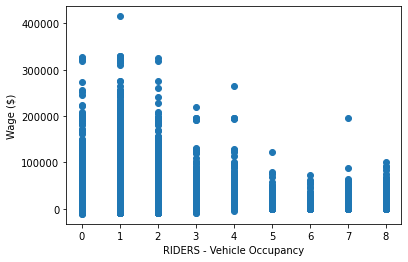

In [15]:
# histogram of mean wage per occupation
for var in num_cols:
    if var == 'REARNING' or var not in df.columns:
        continue
    _ = plt.scatter(df[var].values, df['REARNING'])
    plt.xlabel(f"{var} - {describe_feature(var)}")
    plt.ylabel(r"Wage ($)")
    plt.show()

In [16]:
import seaborn

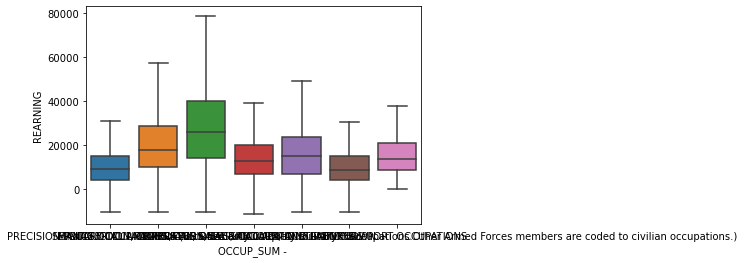

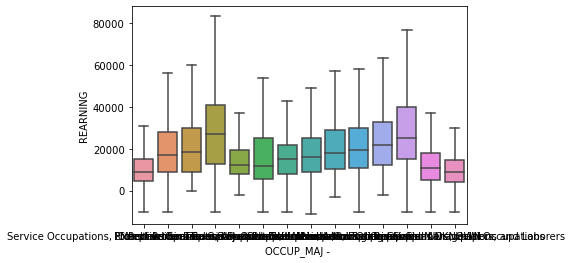

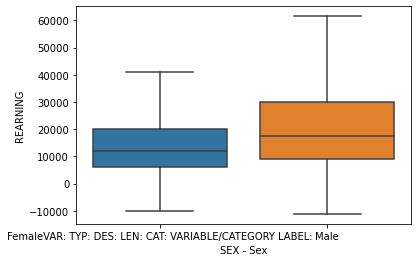

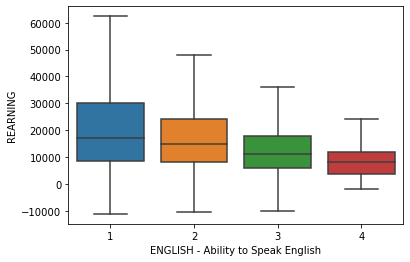

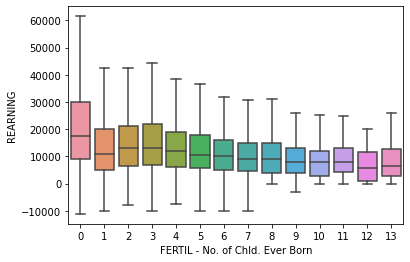

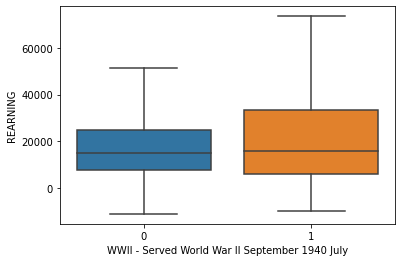

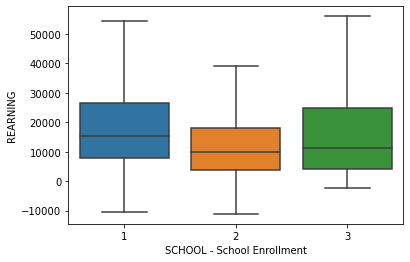

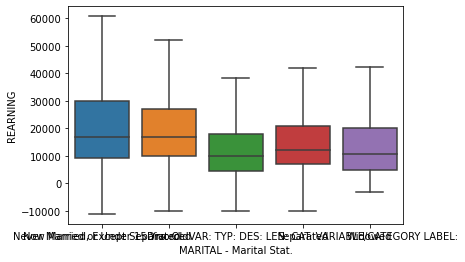

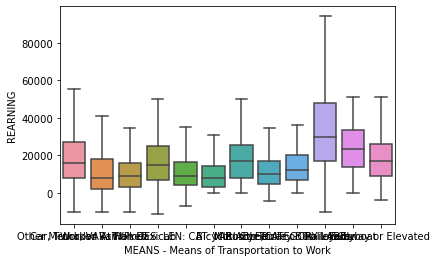

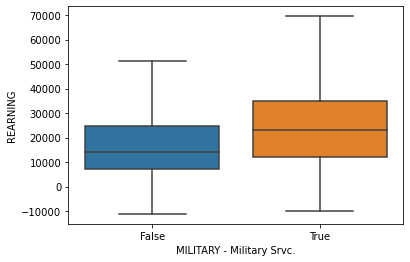

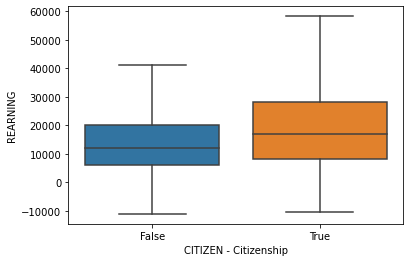

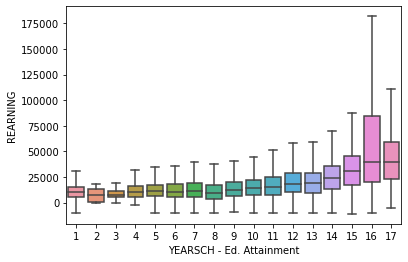

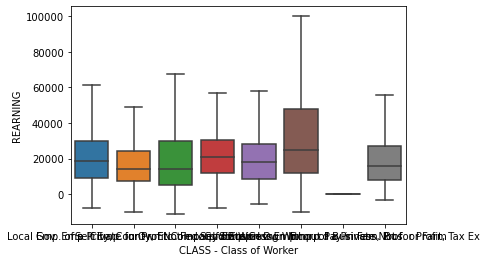

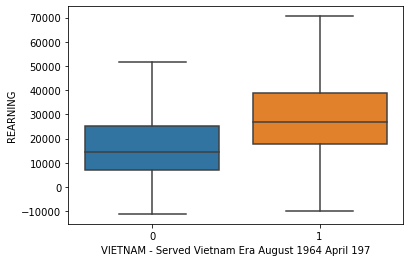

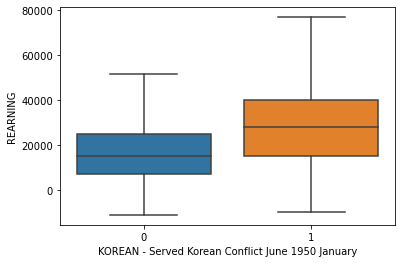

In [17]:
for var in cats:
    cardinality = len(df[var].unique())
    if cardinality > 50:
        continue
    seaborn.boxplot(x =var,
                    y ='REARNING',
                    data = df[[var, 'REARNING']],
                    orient="v",
                    showfliers = False)
    plt.xlabel(f"{var} - {describe_feature(var)}")
    plt.show()

## Data Insights 

#### Highest Paid Jobs?

In [18]:
# how mnay judges are there?
df_tmp = df[['OCCUP_JOB','PWGT1', 'REARNING']]
print(df_tmp[df_tmp['OCCUP_JOB'] == "Judges (212)"]['PWGT1'].sum())

# how mnay lawyers are there?
df_tmp = df[['OCCUP_JOB','PWGT1', 'REARNING']]
df_tmp[df_tmp['OCCUP_JOB'] == "Lawyers (211)"]['PWGT1'].sum()

2073.0


46084.0

/tmp/ipykernel_22943/981130797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb['count']     = gb['PWGT1'].astype(int)
/tmp/ipykernel_22943/981130797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb['OCCUP_JOB'] = gb['OCCUP_JOB'].astype(str)
/tmp/ipykernel_22943/981130797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

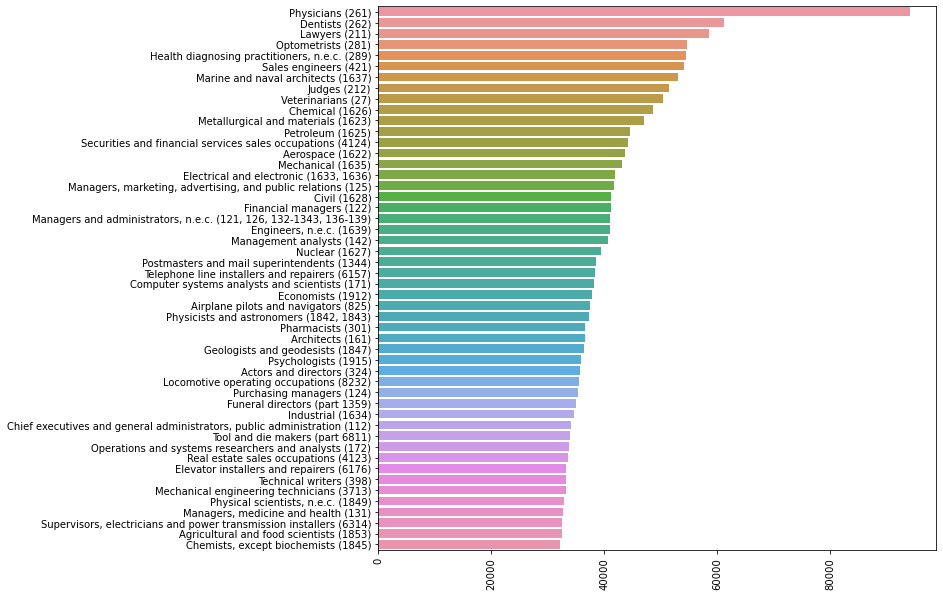

In [19]:
gb = df[['OCCUP_JOB','PWGT1', 'REARNING']]

gb['count']     = gb['PWGT1'].astype(int)
gb['OCCUP_JOB'] = gb['OCCUP_JOB'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('OCCUP_JOB').sum()

min_thresh = gb.sum()['count'] > 1000
gb = gb[gb['count'] > 1000]

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']

df_plot = gb.reset_index().reindex().sort_values('REARNING', ascending=False)

df_plot = df_plot.reset_index().drop('index', axis=1)#.iloc[-100:,:]

fig, ax = plt.subplots(1,1,figsize=(10,10))

seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[:50].astype('str'), 
                x=df_plot['REARNING'].values[:50],
                orient="h")
_ = plt.xticks(rotation=90) 

In [20]:
all_codes['YEARSCH']

{'00': 'N/a Less Than 3 Yrs. Old',
 '01': 'No School Completed',
 '02': 'Nursery School',
 '03': 'Kindergarten',
 '04': '1st, 2nd, 3rd, or 4th Grade',
 '05': '5th, 6th, 7th, or 8th Grade',
 '06': '9th Grade',
 '07': '10th Grade',
 '08': '11th Grade',
 '09': '12th Grade, No Diploma',
 '10': 'High School Graduate, Diploma or Ged',
 '11': 'Some Coll., But No Degree',
 '12': 'Associate Degree in Coll., Occupational',
 '13': 'Associate Degree in Coll., Academic Prog',
 '14': 'Bachelors Degree',
 '15': 'Masters Degree',
 '16': 'Professional Degree',
 '17': 'Doctorate Degree'}

In [21]:
print(df[df['YEARSCH'] != 17]['REARNING'].mean())
print(df[df['YEARSCH'] >= 12]['REARNING'].mean())
print(df[df['YEARSCH'] >= 16]['REARNING'].mean())

19572.12878109635
31264.724866174864
55752.25805734608


### Best place to live

In [22]:
gb = df[['POWSTATE', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[gb['AGE'] > 18]

gb['count']     = gb['PWGT1'].astype(int)
gb['POWSTATE']  = gb['POWSTATE'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('POWSTATE').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
gb['POWSTATE'] = gb['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False)

gb.head(5)

KeyError: 'Abroad'

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['POWSTATE'].values[:100].astype('str'), 
                y=gb['REARNING'].values[:100],
                orient="v")
_ = plt.xticks(rotation=90) 
plt.ylim([15000,35000])

In [ ]:
gb = df[['POWSTATE', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[(gb['AGE'] > 50) & (gb['AGE'] <= 80)]

gb['count']     = gb['PWGT1'].astype(int)
gb['POWSTATE']  = gb['POWSTATE'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('POWSTATE').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
gb['POWSTATE'] = gb['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False)

gb.head(5)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['POWSTATE'].values.astype('str'), 
                y=gb['REARNING'].values,
                orient="v")
_ = plt.xticks(rotation=90) 

In [ ]:
gb = df[['YEARSCH', 'PWGT1', 'AGE', 'REARNING']]

gb = gb[gb['REARNING'] > 5000]
gb = gb[gb['AGE'] > 18]

gb['count']     = gb['PWGT1'].astype(int)
gb['YEARSCH']   = gb['YEARSCH'].astype(str)
gb['REARNING']  = gb['REARNING'] * gb['PWGT1']

gb = gb.groupby('YEARSCH').sum().reset_index().reindex()

gb['REARNING'] = gb['REARNING'] / gb['PWGT1']
gb['YEARSCH']  = gb['YEARSCH'].apply(lambda x: all_codes['YEARSCH'][str(x).zfill(2)])
gb = gb.sort_values('REARNING', ascending=False)




fig, ax = plt.subplots(1,1,figsize=(12,6))

seaborn.barplot(data=None,
                x=gb['YEARSCH'].values[:100].astype('str'), 
                y=gb['REARNING'].values[:100],
                orient="v")
_ = plt.xticks(rotation=90) 

In [ ]:
import pandas as pd
import folium
from   folium.plugins import MarkerCluster
import geocoder
import json

In [ ]:
states_geo = 'USA_States_(Generalized).geojson'
[f['properties']['STATE_NAME'] for f in json.load(open(states_geo,'r'))['features']]

In [ ]:
df.head(1)

In [ ]:
df_wage = df.copy()
df_wage = df_wage[df_wage['REARNING'] > 5000]
df_wage = df_wage[(df_wage['AGE'] > 0) & (df_wage['AGE'] < 100)]

df_wage['REARNING'] = df_wage['REARNING'] * df_wage['PWGT1']
gb_wage = df_wage[['POWSTATE', 'REARNING', 'PWGT1']].groupby('POWSTATE')

df_wage = gb_wage.sum().reset_index()
df_wage['REARNING'] = df_wage['REARNING'] / df_wage['PWGT1']

df_wage['POWSTATE'] = df_wage['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_wage = df_wage.sort_values('REARNING')

In [ ]:
world_choropelth = folium.Map(location=[0, 0], 
                              tiles='Cartodb Positron',
                              zoom_start=2)

world_choropelth.choropleth(
    geo_data=states_geo,
    data=df_wage,
    columns=['POWSTATE', 'REARNING'],
    key_on='feature.properties.STATE_NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Salary ($)')

# display map
world_choropelth

In [ ]:
df[['OCCUP','AGE','REARNING']].groupby('OCCUP').mean()

### Jobs

In [ ]:
gb          = df[['OCCUP_JOB', 'REARNING']].copy()
gb['count'] = 1
gb          = gb.groupby('OCCUP_JOB')

df_plot = gb.mean()[gb.sum()['count']>500].reset_index().reindex().sort_values('REARNING', ascending=False)
df_plot = df_plot.reset_index().drop('index', axis=1)

In [ ]:
top_k = 50
fig, ax = plt.subplots(1,1,figsize=(10,10))
seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[:top_k].astype('str'), 
                x=df_plot['REARNING'].values[:top_k],
                orient="h")
_ = plt.xticks(rotation=90) 

In [ ]:
bottom_k = 25
fig, ax = plt.subplots(1,1,figsize=(10,10))
seaborn.barplot(data=None,
                y=df_plot['OCCUP_JOB'].values[-bottom_k:].astype('str'), 
                x=df_plot['REARNING'].values[-bottom_k:],
                orient="h")
_ = plt.xticks(rotation=90) 

In [ ]:
df_plot = df[['OCCUP','OCCUP_SUM']].groupby('OCCUP_SUM').count().reset_index()

#define data
data   = df_plot['OCCUP']
labels = df_plot['OCCUP_SUM']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

In [ ]:
df_plot = df[['OCCUP','OCCUP_MAJ']].groupby('OCCUP_MAJ').count().reset_index()

#define data
data   = df_plot['OCCUP']
labels = df_plot['OCCUP_MAJ']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

In [ ]:
df[['OCCUP','OCCUP_SUM']].groupby('OCCUP_SUM').count()

In [ ]:
df_plot = df[['INDUSTRY','INDUSTRY_SUM']].groupby('INDUSTRY_SUM').count().reset_index()

#define data
data   = df_plot['INDUSTRY']
labels = df_plot['INDUSTRY_SUM']

idx = data.argsort()
data   = [data[i] for i in idx]
labels = [labels[i] for i in idx]

#define Seaborn color palette to use
colors = seaborn.color_palette('pastel')[0:len(data)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%',explode=[0.1] * len(data))
plt.show()

### Validation using external sources

Check the USA GDP using our data

In [ ]:
# billions in wages
100 * df['REARNING'].sum() / 1e9

In [ ]:
gdp_bn_1990 = 5963 
# Share of Labour Compensation in GDP at Current National Prices for United States = 0.61 for 1990
0.61 * gdp_bn_1990

In [26]:
tst = pd.read_csv(os.path.join(r"./",'USCensus1990raw.data.txt'), 
                 delimiter="\t", 
                 header=0, 
#                  nrows=100000, 
                 dtype=str)
tst.columns = list(df_meta['Var'].values)

ValueError: Length mismatch: Expected axis has 125 elements, new values have 124 elements

In [ ]:
# The USCensus1990raw data set contains a one percent sample of the Public Use Microdata Samples (PUMS) person records drawn from the full 1990 census sample.
(250000000 / tst.shape[0])*tst['RPINCOME'].astype(float).sum() / 1e9

In [ ]:
# military size : should be 2M
(1640/137970)*250000000

### Where is there the largest wage discrpenancy based on race?

In [25]:
import pandas as pd
import folium          #  folium libraries
from   folium.plugins import MarkerCluster

try:
    import geocoder    #  geocoder
except:
    ! pip install geocoder
    import geocoder    #  geocoder
import json

states_geo = 'USA_States_(Generalized).geojson'
# [f['properties']['STATE_NAME'] for f in json.load(open(states_geo,'r'))['features']]

ModuleNotFoundError: No module named 'folium'

In [ ]:
race_map ={
    'White 800 869, 971' : 'white',
}
df['RACE_BW'] = df['RACE'].apply(lambda x: race_map.get(x, 'nonwhite'))

In [ ]:
df_wage = df.copy()
df_wage = df_wage[(df_wage['REARNING'] > 5000) & (df_wage['REARNING'] < 100000)]
# df_wage = df_wage[(df_wage['AGE'] > 20) & (df_wage['AGE'] < 80)]
df_wage = df_wage[['POWSTATE','RACE_BW', 'REARNING']].groupby(['POWSTATE','RACE_BW']).mean().reset_index()
df_wage['POWSTATE'] = df_wage['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_wage = df_wage.sort_values('REARNING')

data = {}
for state in df_wage['POWSTATE'].unique():
    df_tmp = df_wage[df_wage['POWSTATE'] == state]

    w1 = df_tmp[df_tmp['RACE_BW'] == 'white']['REARNING'].values[0]
    w2 = df_tmp[df_tmp['RACE_BW'] == 'nonwhite']['REARNING'].values[0]
    data[state] = w1/w2

In [ ]:
world_choropelth = folium.Map(location=[0, 0], 
                              tiles='Cartodb Positron',
                              zoom_start=2)

world_choropelth.choropleth(
    geo_data=states_geo,
    data=data,
    columns=['POWSTATE', 'REARNING'],
    key_on='feature.properties.STATE_NAME',
    fill_color='Reds',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Salary Ratio White/Non-White')

# display map
world_choropelth 

In [ ]:
df['RACE']

## Migration

In [ ]:
df_2 = df.copy()
df_2['POWSTATE'] = df_2['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_2['POB']      = df_2['POB'].apply(lambda x: all_codes['POB'][str(x).zfill(3)])

df_wage = df_2.copy()
df_wage = df_wage[['POWSTATE','POB', 'REARNING']].groupby(['POWSTATE','POB']).mean().reset_index()
df_wage = df_wage.sort_values('REARNING', ascending=False)
df_wage['Count'] = df_wage.apply(lambda x: df_2[(df_2['POWSTATE'] == x['POWSTATE']) & 
                                                (df_2['POB']      == x['POB'])        ].shape[0], axis=1)

In [ ]:
# some anomalies due to single people
df_wage

In [ ]:
# high earners, excluding small sample sizes
df_wage[df_wage['Count'] > 50].sort_values('REARNING', ascending=False)

In [ ]:
# what education do they have?
df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')].groupby('YEARSCH_CAT').count()['CITIZEN']

In [ ]:
# How old are they?
_ = plt.hist(df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')]['AGE'], bins=25)

In [ ]:
# what are they doing?
df_2[(df_2['POWSTATE'] == 'New York') & (df_2['POB'] == 'Japan')].groupby('OCCUP_SUM').count()

In [ ]:
df.shape

In [ ]:
# TODO : Sankey the fuck out of this

df_migration = df.copy()

df_migration = df_migration[['PWGT1','POWSTATE',"MIGSTATE"]].groupby(['POWSTATE',"MIGSTATE"]).sum().reset_index()

df_migration = df_migration[(df_migration['POWSTATE'] != 0) & (df_migration['MIGSTATE'] != 0)]
# df_migration = df_migration[(df_migration['POWSTATE'] != 99) & (df_migration['MIGSTATE'] != 99)]


df_migration['POWSTATE'] = df_migration['POWSTATE'].apply(lambda x: all_codes['POWSTATE'][str(x).zfill(2)])
df_migration['MIGSTATE'] = df_migration['MIGSTATE'].apply(lambda x: all_codes['MIGSTATE'][str(x).zfill(2)])

df_migration.sort_values('PWGT1', ascending=False).head(50)

In [ ]:

df['RPOB']

In [ ]:
all_codes['RPOB']

In [ ]:
df["POB"]